<b> FFI Tutorial </b>

<i>Author: Lindsey Gordon @lcgordon. Updated 8/25/2020 </i>

Allows the user to provide a SIMBAD criteria query. Produces a fits file containing FFI light curves for all targets matching that query, generated using the eleanor package, and a fits file of the v0 feature vector. 

Optional: tls = True, also produces the 4 additional v1 features. Requires the user to be able to run transitleastsquares (can be finnicky on Windows). 

Option: download=False. If the user already has the light curves and features, they can choose this option to just access the information from those files + use it in the plotting and clustering functions. 


In [2]:
#imports
import ffi_functions as ffi
import data_functions as df
import plotting_functions as pf

Create the class object. Requires the Table_of_momentum_dumps.csv file available from TESS. 

This example uses a simbadquery that only returns 15 targets. If you return more than 20,000 targets (check this on the actual SIMBAD page), you will need to split your query into smaller portions as Astroquery.SIMBAD will only return 20,000 at a time.

In [14]:
ffi_run = ffi.FFI_lc(path="/users/conta/urop/", folderlabel="Vmag7.5", simbadquery="Vmag <=7.5",
                 download=False, tls=False, 
                 momentumdumpcsv = "/users/conta/urop/Table_of_momentum_dumps.csv")

Not downloading anything. Attempting to access LC and Features
Vmag7.5_features
found  1 feature files
[-5.23642969e-03  6.76310932e-03 -1.71381693e-03  1.03180001e-03
 -4.99627254e+00 -6.36903228e+00 -6.87645042e+00  5.52688240e-02
 -2.89554629e+00  1.84823491e+00  2.44548933e-03 -6.01351004e+00
  1.77053560e-02  1.31490938e-02  3.12327610e-03  2.08791889e-03]


The next chunk of code uses the function clip_feature_outliers, which removes any outlier features outside of the sigma limit provided by the user (default is 20) as well as any targets whose feature vectors contain NaN values, which cannot be used in the classifier algorithms. 

This function WILL update the /self\ versions of the class variables, so if you want the original lists you will need to re-run ffi.FFI_lc. You CANNOT RUN THIS MULTIPLE TIMES, YOU HAVE TO RESET TO RERUN.

This cuts down the number of working targets to 13. 

Starting with  13  light curves.
/users/conta/urop/ffi_lc_Vmag7.5/clipped-feature-outliers/ already exists
[11 12]
H=-0.084


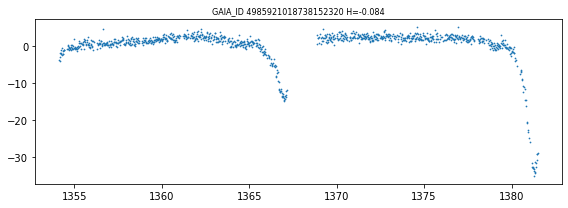

$\Lambda$=0.0088


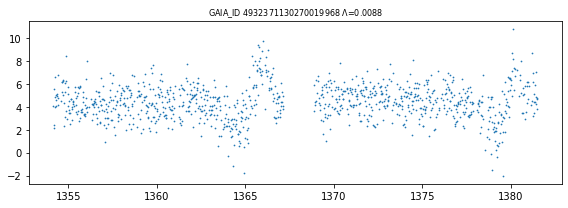

There are  11  light curves left.


In [15]:
print("Starting with ", len(ffi_run.intensities), " light curves.")
features, gaia_ids, flux, time, outlier_indexes = ffi_run.clip_feature_outliers(sigma=3, plot=True)
print("There are ", len(ffi_run.intensities), " light curves left.")

features_plotting() plots (n 2) features against each other. If you provide a clustering algorithm ('dbscan' or 'kmeans'), it will classify based on the parameters you give it and color the points based on those classifications. Also saves plots of the first 10 targets to appear in each class. 

Successfully created the directory /users/conta/urop/ffi_lc_Vmag7.5/dbscan-colored


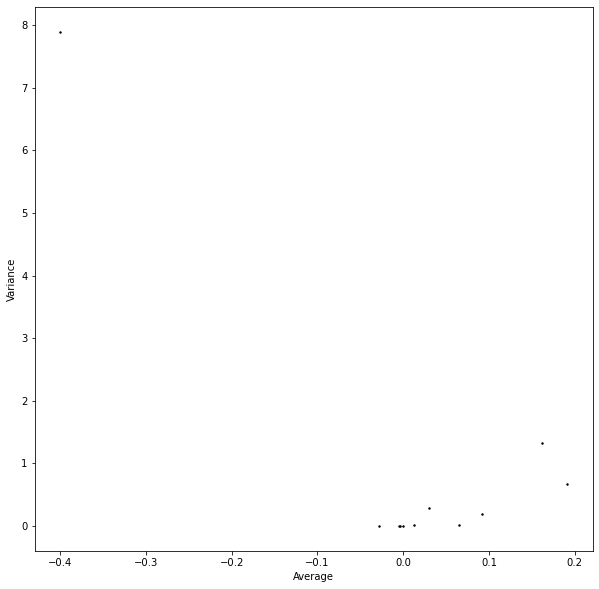

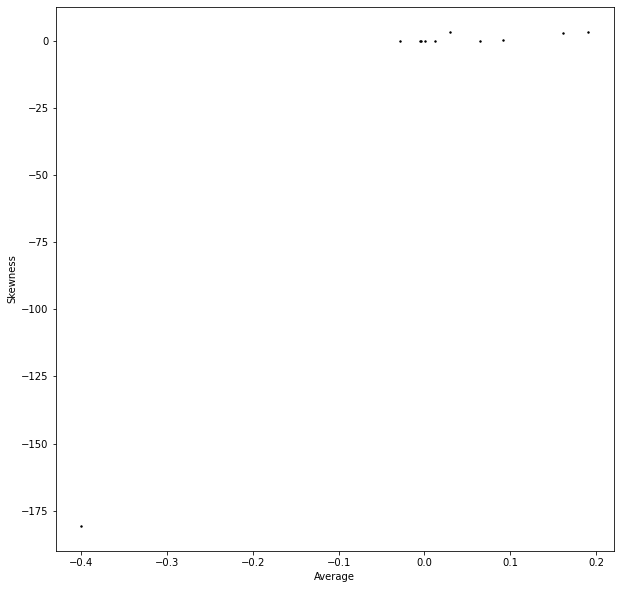

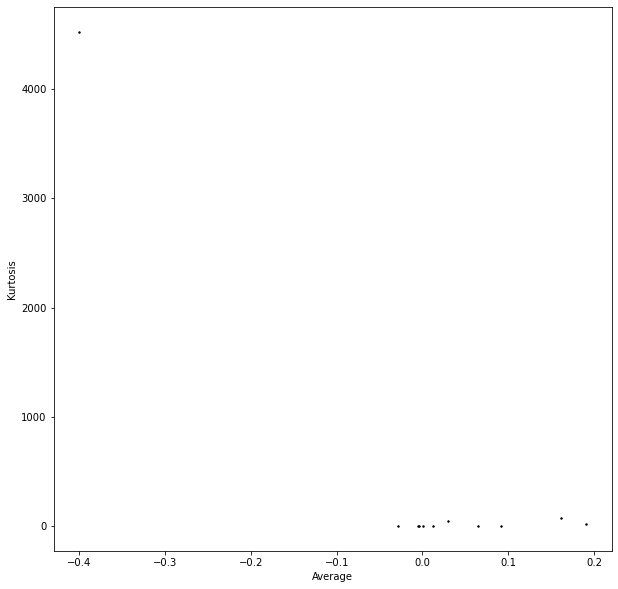

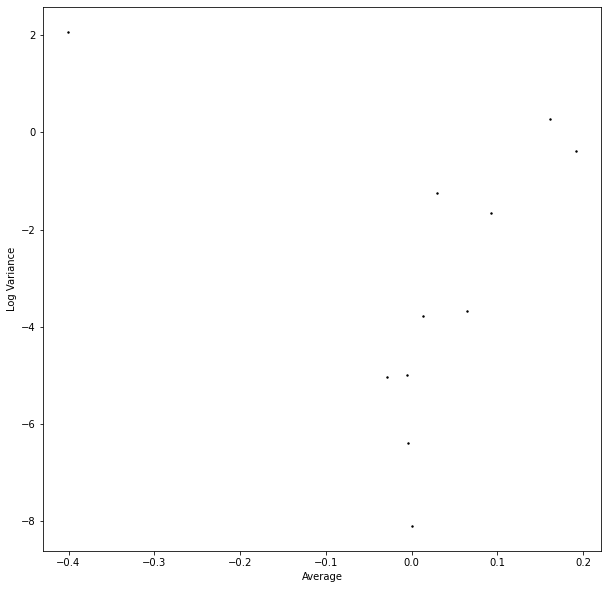

KeyboardInterrupt: 

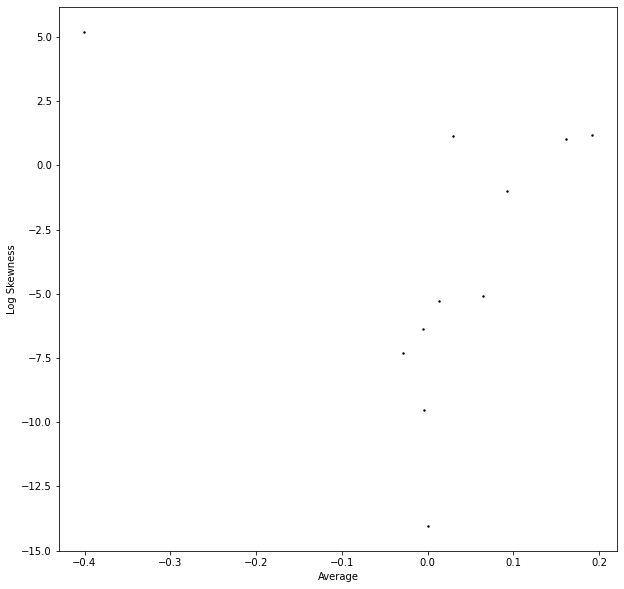

In [8]:
ffi_run.features_plotting( clustering = 'dbscan', eps=3, min_samples=3,
                             metric='minkowski', algorithm='auto', leaf_size=30,
                             p=2, kmeans_clusters=None)

plot_lof() calculates the local outlier factor (LOF) anomaly score for each feature vector, and then plots the n_tot highest and lowest in groups of n light curves per plot

In [16]:
ffi_run.plot_lof(n=3,n_neighbors=4, n_tot=6)

Calculating LOF
Saving LOF values
Make LOF histogram
Plot highest LOF and lowest LOF light curves
